<a href="https://colab.research.google.com/github/strawndri/Edutech-projeto_final/blob/main/Notebooks/analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importações**

## *1.1 Bibliotecas*

In [106]:
import pandas as pd

import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

## *1.2 Base de Dados*

In [107]:
dataset = pd.read_csv('https://www.educacao.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-11/edutech_comparativos_metricas.csv', sep=';')
dataset.head()

,Ano Censo,Número de Vagas Oferecidas,Número de Tipo de Ingressos,Número de Matrículas,Número de Concluintes,Número de Inscritos,Número de Cursos,Nome Região
0,2017,6075252.0,2135126.0,6529681,947606,14605840.0,33522.0,BRASIL
1,2017,554885.0,208370.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE
2,2017,1138928.0,441493.0,1447248,188730,3804497.0,6715.0,NORDESTE
3,2017,383771.0,143622.0,473716,64851,1367659.0,2513.0,NORTE
4,2017,3086636.0,1026159.0,3003075,458824,6516557.0,14861.0,SUDESTE


# **2. Funções**

In [108]:
# Determina as configurações básicas de todos os gráficos

# width e height: comprimento e altura;
# title: título;
# ytitle: determina a altura do título no eixo y.

def plot_config(width, height, title, ytitle=0.95):
  sns.set_style('darkgrid')
  plt.figure(figsize=(width, height))
  plt.suptitle(title, y=ytitle, fontsize=18)

In [126]:
# Apresenta diferentes gráficos de curva para comparação

# Title: título;
# x: determinação do eixo x;
# y: determinação do eixo y (recebe diferentes valores);
# hue: especifica qual será o colorcode conforme determinada coluna do dataframe;
# data: seleção de dataframe.

def comparing_results1(title, x, *y, hue, data):

  total = len(y)
  plot_config(18, 24, title, 1.02)

  for i, item in enumerate(y):

    if (i == 0):
      ax = plt.subplot(total, 2, i+1)
    else:
      plt.subplot(total, 2, i+1)

    plt.tight_layout(h_pad=3.0) # espaçamento entre os gráficos
    plt.title(columns[i + 1], fontsize=14)

    sns.lineplot(x=x, y=item, hue=hue, data=data, palette="flare")

    plt.xlabel(x.split('_')[0].title(), fontsize=12)
    plt.ylabel(columns[i + 1], fontsize=12)

    plt.legend(loc='upper right', fontsize='10')

# **3. Tratamento de Dados**

## *3.1 Removendo células Not a Number (NaN)*

> Dados **NaN (Not a Number)** indicam valores que foram perdidos e que não representados, isto é, trata-se de um valor indefinido. É importante que exista um tratamento destes dados, visto que podem ocasionar problemas durante a análise.



In [110]:
# dados antes da atualização
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano Censo                    57 non-null     int64  
 1   Número de Vagas Oferecidas   55 non-null     float64
 2   Número de Tipo de Ingressos  46 non-null     float64
 3   Número de Matrículas         57 non-null     int64  
 4   Número de Concluintes        57 non-null     int64  
 5   Número de Inscritos          55 non-null     float64
 6   Número de Cursos             54 non-null     float64
 7   Nome Região                  57 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 3.7+ KB


In [111]:
# tratamento de células NaN:
# o laço de repetição reconhece cada coluna do dataset;
# reconhece-se o indíce e depois o valor da lista;
# analisa se é NaN (caso seja, o valor será alterado para 0).
for column in dataset:
  for i, item in enumerate(dataset[column]):
    if (pd.isnull(item)):
      dataset.loc[i, column] = 0

# dados pós atualização
# obs: não há mais celulas NaN
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano Censo                    57 non-null     int64  
 1   Número de Vagas Oferecidas   57 non-null     float64
 2   Número de Tipo de Ingressos  57 non-null     float64
 3   Número de Matrículas         57 non-null     int64  
 4   Número de Concluintes        57 non-null     int64  
 5   Número de Inscritos          57 non-null     float64
 6   Número de Cursos             57 non-null     float64
 7   Nome Região                  57 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 3.7+ KB


## *3.2 Renomeando as colunas (removendo acentos e espaços)*

In [112]:
# salvando os nomes antigos para serem utilizados futuramente
columns = []
for item in dataset.columns:
  columns.append(item.replace('Número de', ''))

In [113]:
new_columns = {
    'Ano Censo' : 'ano_censo', 
    'Número de Vagas Oferecidas' : 'vagas_oferecidas',
    'Número de Tipo de Ingressos' : 'tipo_ingressos', 
    'Número de Matrículas' : 'matriculas',
    'Número de Concluintes' : 'concluintes', 
    'Número de Inscritos' : 'inscritos', 
    'Número de Cursos' : 'cursos',
    'Nome Região' : 'regiao'
}

# subtituição dos nomes de cada coluna a partir do dicionario "new_names"
dataset = dataset.rename(columns = new_columns)
dataset.head()

,ano_censo,vagas_oferecidas,tipo_ingressos,matriculas,concluintes,inscritos,cursos,regiao
0,2017,6075252.0,2135126.0,6529681,947606,14605840.0,33522.0,BRASIL
1,2017,554885.0,208370.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE
2,2017,1138928.0,441493.0,1447248,188730,3804497.0,6715.0,NORDESTE
3,2017,383771.0,143622.0,473716,64851,1367659.0,2513.0,NORTE
4,2017,3086636.0,1026159.0,3003075,458824,6516557.0,14861.0,SUDESTE


# **4. Análise de Dados**

## *4.1 Taxas de crescimento ou decaimento ano a ano para todas as regiões do Brasil*

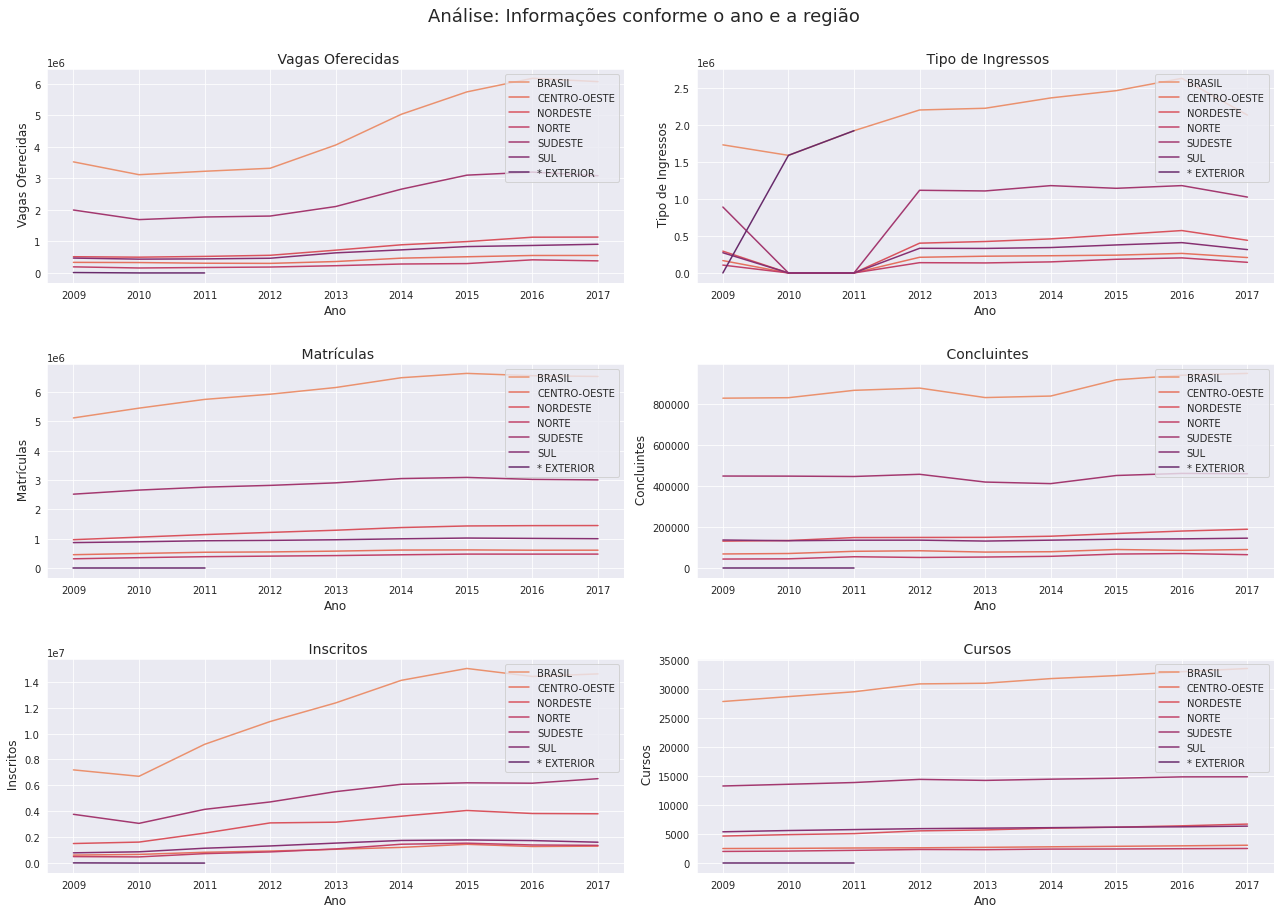

In [127]:
comparing_results1('Análise: Informações conforme o ano e a região',
               'ano_censo', 'vagas_oferecidas', 'tipo_ingressos',
               'matriculas', 'concluintes',	'inscritos',	'cursos', hue='regiao', data=dataset);

## *4.2 Número de vagas oferecidas por região ano a ano*

## *4.3 Relação entre vagas e o número de ingressos*

## *4.4 Crescimento no número de matrículas por região*

## *4.5 Número de concluintes em cada região*

## *4.6 Comparação: número de inscritos e o número de matrículas*

## *4.7 Número de cursos ofertados na região e seus impactos no aumento de inscritos e/ou número de matrículas*

# **5. Conclusão Final**